In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
macro = pd.read_csv('Clean_macro.csv')

In [3]:
del train['id']
del test['id']

Clean macro data
for i in range(macro.shape[0]):
    for j in range(1,macro.shape[1]):
        try:
            macro.ix[i,j] = macro.ix[i,j].replace(',','')
        except Exception:
            pass

In [4]:
# Get Macro Variables
macro_vars = list(macro.columns)
macro_vars.remove('timestamp')

Further Cleansing
for each in macro_vars:
    macro[each] = macro[each].replace('#!',None)

Numeric Transformation
for each in macro_vars:
    macro[each] = list(np.array(macro[each]).astype(np.float))

macro.to_csv('Clean_macro.csv')

In [5]:
train_columns = list(train.columns)
train_columns.remove('timestamp')
for each in train_columns:
    if train[each].dtype == 'O':
        train[each]=pd.factorize(train[each], sort=True)[0]
        test[each]=pd.factorize(test[each], sort=True)[0]

In [6]:
## function to calculate NA Values
def NA_Countf(data):
    NA_Count = pd.DataFrame({'Sum of NA':data.isnull().sum()}).sort_values(by=['Sum of NA'],ascending=[0])
    NA_Count['Percentage'] = NA_Count['Sum of NA']/data.shape[1]
    NA_Count = NA_Count[NA_Count['Percentage']>0]
    return NA_Count

In [7]:
## Train, test and Macro NA Counts
NA_Train = NA_Countf(train)
NA_Test = NA_Countf(test)
NA_Macro = NA_Countf(macro)

In [8]:
## Check whether train and test have different columns
print(len(list(NA_Train.columns))==len(list(NA_Test.columns)))
Non_OL = [each for each in list(NA_Train.columns) if each not in list(NA_Test.columns)]
print(len(Non_OL))
Non_OL = [each for each in list(NA_Test.columns) if each not in list(NA_Train.columns)]
print(len(Non_OL))

True
0
0


In [9]:
## Macro_NA Dealing
MA_DropD = NA_Macro[NA_Macro['Percentage']>0.5].index.tolist()
MA_Dealing = [each for each in NA_Macro.index.tolist() if each not in MA_DropD]

In [10]:
## Use Median Values to fill the NA in those columns
for each in MA_Dealing:
    Drop_NA = list(macro[each].dropna())
    Drop_NA = list(np.array(Drop_NA).astype(np.float))
    fill_value = np.median(Drop_NA) 
    macro[each] = macro[each].fillna(fill_value)

In [11]:
## Prepare Final Macro Data
Macro_Kept = [each for each in list(macro.columns) if each not in MA_DropD]
macro = macro[Macro_Kept]

In [12]:
## Train, test NA Values Dealing
Train_drop = NA_Train[NA_Train['Percentage']>=0.5].index.tolist()
print(Train_drop)

['hospital_beds_raion', 'build_year', 'state', 'cafe_avg_price_500', 'cafe_sum_500_max_price_avg', 'cafe_sum_500_min_price_avg', 'max_floor', 'material', 'num_room', 'kitch_sq', 'preschool_quota', 'school_quota', 'cafe_sum_1000_max_price_avg', 'cafe_sum_1000_min_price_avg', 'cafe_avg_price_1000', 'life_sq', 'build_count_after_1995', 'build_count_foam', 'raion_build_count_with_material_info', 'build_count_block', 'build_count_wood', 'build_count_frame', 'build_count_brick', 'build_count_1946-1970', 'build_count_panel', 'build_count_monolith', 'build_count_slag', 'build_count_mix', 'raion_build_count_with_builddate_info', 'build_count_before_1920', 'build_count_1921-1945', 'build_count_1971-1995', 'cafe_avg_price_1500', 'cafe_sum_1500_max_price_avg', 'cafe_sum_1500_min_price_avg', 'cafe_sum_2000_max_price_avg', 'cafe_sum_2000_min_price_avg', 'cafe_avg_price_2000', 'cafe_avg_price_3000', 'cafe_sum_3000_max_price_avg', 'cafe_sum_3000_min_price_avg', 'cafe_sum_5000_min_price_avg', 'cafe_sum

In [13]:
## Some features should not be dropped 
Train_drop.remove('build_year')
Train_drop.remove('state')
Train_drop.remove('max_floor')
Train_drop.remove('material')
Train_drop.remove('num_room')
Train_drop.remove('kitch_sq')
Train_drop.remove('life_sq')
Train_drop.remove('floor')

In [14]:
KeptV = [each for each in list(train.columns) if each not in Train_drop]

In [15]:
DealtV = [each for each in NA_Train.index.tolist() if each not in Train_drop]

In [16]:
## Fill NA in table by median values
for each in DealtV:
    Drop_NA = list(train[each].dropna())
    Drop_NA = list(np.array(Drop_NA).astype(np.float))
    fill_value = np.median(Drop_NA) 
    train[each] = train[each].fillna(fill_value)
    test[each] = test[each].fillna(fill_value)

In [17]:
train = train[KeptV]

In [18]:
T_KeptV = KeptV
T_KeptV.remove('price_doc')
test = test[T_KeptV]

In [19]:
## Merge train,test and macro data together
train = train.merge(macro,how='left',on='timestamp')
test = test.merge(macro,how='left',on='timestamp')

In [20]:
train.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,average_provision_of_build_contract,rts,micex,micex_rgbi_tr,micex_cbi_tr,deposits_value,deposits_growth,mortgage_value,mortgage_rate,fixed_basket
0,2011-08-20,43,27.0,4.0,12.0,1.0,1979.0,2.0,6.0,2.0,...,5.76,1575.33,1438.74,131.16,204.78,10618898,0.009740,323275,11.84,12838.36
1,2011-08-23,34,19.0,3.0,12.0,1.0,1979.0,2.0,6.0,2.0,...,5.76,1578.91,1444.11,131.45,204.92,10618898,0.009740,323275,11.84,12838.36
2,2011-08-27,43,29.0,2.0,12.0,1.0,1979.0,2.0,6.0,2.0,...,5.76,1596.17,1458.84,131.08,204.84,10618898,0.009740,323275,11.84,12838.36
3,2011-09-01,89,50.0,9.0,12.0,1.0,1979.0,2.0,6.0,2.0,...,5.76,1703.86,1551.58,131.45,205.42,10720911,0.009607,386388,11.92,12856.97
4,2011-09-05,77,77.0,4.0,12.0,1.0,1979.0,2.0,6.0,2.0,...,5.76,1617.01,1492.83,131.19,198.24,10920215,0.018590,386388,11.92,12856.97


In [21]:
print(train.shape)
print(test.shape)

(30471, 272)
(7662, 271)


In [22]:
train['log_price']= np.log(train['price_doc'])

In [40]:
del train['timestamp']
del test['timestamp']

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
training,testing = train_test_split(train,test_size=0.2,random_state=42)

In [43]:
features_col = list(train.columns)
features_col.remove('log_price')
features_col.remove('price_doc')

In [44]:
features = training[features_col]
Label = training['log_price']
testingf = testing[features_col]
testingL = testing['price_doc']

In [45]:
## Define Cost Function
def RMSLE(prediction,actual):
    leng = len(prediction)
    pred_add = [each+1 for each in prediction]
    actual_add = [each+1 for each in actual]
    log_pred = list(np.log(pred_add))
    log_actual = list(np.log(actual_add))
    minus = [i-j for i,j in zip(log_pred,log_actual)]
    return np.power(sum(np.power(minus,2))/leng,0.5)

In [46]:
import xgboost as xgb

In [47]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse

In [52]:
## First, use the Decision Tree Regressor to select the appropriate tree size.
mdepth = range(1,11)
rmse_g = []
rmsle_g = []
for each in mdepth:
    dt_clf = DecisionTreeRegressor(criterion='mse',max_depth=each)
    dt_clf.fit(features,Label)
    pred = dt_clf.predict(testingf)
    true_pred = np.exp(pred)
    rmse = mse(testingL,true_pred)**0.5
    rmsle = RMSLE(true_pred,testingL)
    rmse_g.append(rmse)
    rmsle_g.append(rmsle)

In [55]:
Summary = pd.DataFrame({'Depth':mdepth,'RMSE':rmse_g,'RMSLE':rmsle_g})

In [56]:
from ggplot import *

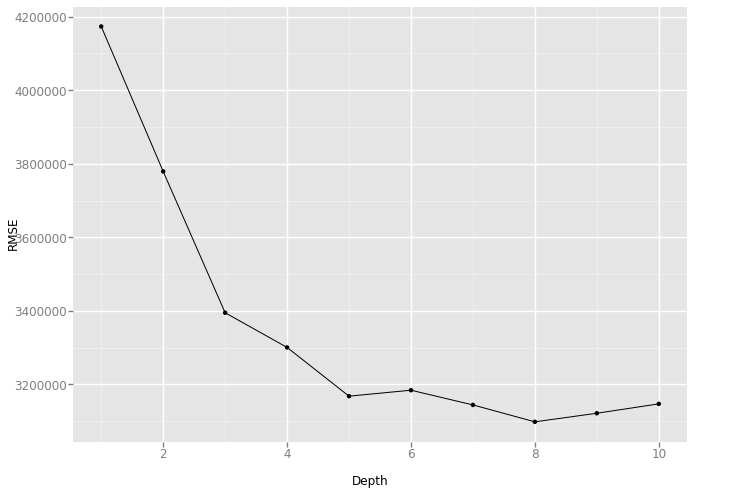

<ggplot: (-9223363266460601393)>


In [57]:
g = ggplot(Summary,aes(x='Depth',y='RMSE'))+geom_point()+geom_line()
print(g)

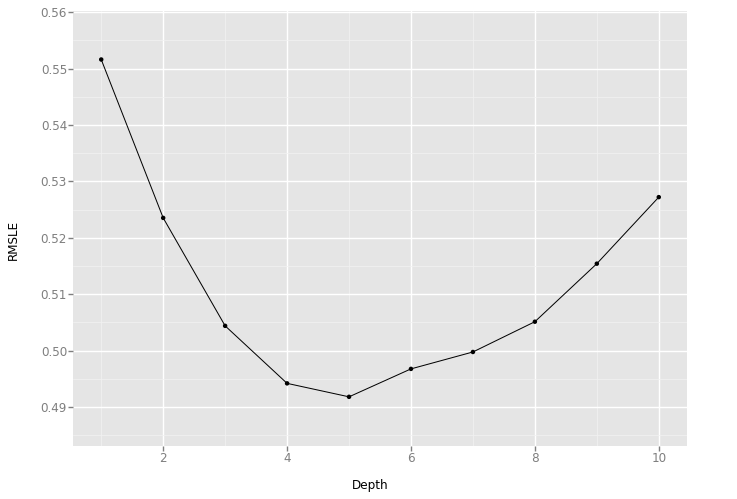

<ggplot: (8770394174363)>


In [58]:
g = ggplot(Summary,aes(x='Depth',y='RMSLE'))+geom_point()+geom_line()
print(g)

In [60]:
## Max Depth is set to 5
train_DMatrix = xgb.DMatrix(features, label=Label)
test_DMatrix = xgb.DMatrix(testingf)

In [68]:
## Get GridSearchCV From Sklearn
from sklearn.grid_search import GridSearchCV  
from xgboost.sklearn import XGBRegressor
import matplotlib.pyplot as plt
import matplotlib

In [86]:
## Define a model fit function
def modelfit(alg, dtrain=training, predictors=features_col,dtest=testing,cv_folds=5):
    xgb_param = alg.get_xgb_params()
    xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain['log_price'].values)
    cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='rmse')
    alg.set_params(n_estimators=cvresult.shape[0])
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['log_price'],eval_metric='rmse')
    #Predict training set:
    dtest_predictions = alg.predict(dtest[predictors])
    dtest_predictions = np.exp(dtrain_predictions)
    #RMSE And RMSLE Report
    RMSE_model = mse(dtest['price_doc'],dtrain_predictions)**0.5
    RMSLE_model = RMSLE(dtrain_predictions,dtest['price_doc'])
    #Print model report:
    print("\nModel Report")
    print('RMSE of Model: '+str(RMSE_model))
    print('RMSLE of Model: '+str(RMSLE_model))
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [87]:
## Step 1: Choose a relatively large learning rate and estimators to tune tree-parameters
xgb1 = XGBRegressor(
 learning_rate =0.1,
 n_estimators= 1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'reg:linear',
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1)

KeyboardInterrupt: 

In [84]:
training.shape

(24376, 272)

In [85]:
testing.shape

(6095, 272)